## Reg. no: 20BAI1055
## Name: Rakesh Kumar K S
### Lab-2: Hyperparameter tuning

In [1]:
import pandas as pd
import numpy as np

### Importing the dataset

In [2]:
# Source: https://www.kaggle.com/datasets/robjan/ph-recognition
df = pd.read_csv("./ph-data.csv")
df.head()

,blue,green,red,label
0,36,27,231,0
1,36,84,250,1
2,37,164,255,2
3,22,205,255,3
4,38,223,221,4


### EDA

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

<BarContainer object of 653 artists>

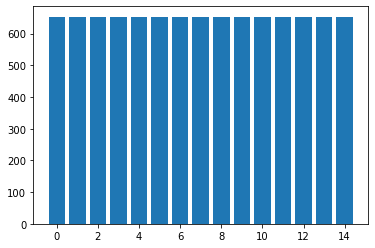

In [4]:
plt.bar(df['label'], df['label'].count())

As we can see above, the dataset is well balanced among the classes 0 to 14

### Pre-processing

In [5]:
df['blue'] = df['blue']/255
df['green'] = df['green']/255
df['red'] = df['red']/255

df.head()

,blue,green,red,label
0,0.141176,0.105882,0.905882,0
1,0.141176,0.329412,0.980392,1
2,0.145098,0.643137,1.000000,2
3,0.086275,0.803922,1.000000,3
4,0.149020,0.874510,0.866667,4


### Splitting the data into train, val and test set

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop(columns=['label'])
y = df[['label']]

In [8]:
X.shape

(653, 3)

Splitting train and test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [10]:
y_train.shape

(522, 1)

In [11]:
y_test.shape

(131, 1)

Splitting train and val

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=7)

In [13]:
y_train.shape

(417, 1)

In [14]:
y_val.shape

(105, 1)

### Encoding the output labels

In [15]:
df['label'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

In [16]:
output_classes = 15 # From 0 to 14

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y_train = to_categorical(y_train, output_classes)
y_val = to_categorical(y_val, output_classes)
y_test= to_categorical(y_test, output_classes)

In [19]:
y_train.shape

(417, 15)

In [20]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Building the Neural Network

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [22]:
def create_base_model(h=0):
    model = Sequential([Dense(30,input_shape=(3,),activation='relu'),
                    Dense(15, activation='softmax'),
                       ])
    model.compile(optimizer=SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [23]:
model = create_base_model()

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                120       
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
Total params: 585
Trainable params: 585
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train, y_train, epochs=50, verbose=2, validation_data=(X_val, y_val))

Epoch 1/50
14/14 - 1s - loss: 2.6826 - accuracy: 0.0743 - val_loss: 2.6732 - val_accuracy: 0.0476 - 850ms/epoch - 61ms/step
Epoch 2/50
14/14 - 0s - loss: 2.6450 - accuracy: 0.0791 - val_loss: 2.6384 - val_accuracy: 0.0571 - 54ms/epoch - 4ms/step
Epoch 3/50
14/14 - 0s - loss: 2.6137 - accuracy: 0.0647 - val_loss: 2.6056 - val_accuracy: 0.0667 - 59ms/epoch - 4ms/step
Epoch 4/50
14/14 - 0s - loss: 2.5808 - accuracy: 0.0863 - val_loss: 2.5706 - val_accuracy: 0.1429 - 58ms/epoch - 4ms/step
Epoch 5/50
14/14 - 0s - loss: 2.5485 - accuracy: 0.1487 - val_loss: 2.5382 - val_accuracy: 0.1429 - 52ms/epoch - 4ms/step
Epoch 6/50
14/14 - 0s - loss: 2.5137 - accuracy: 0.1391 - val_loss: 2.5015 - val_accuracy: 0.0857 - 55ms/epoch - 4ms/step
Epoch 7/50
14/14 - 0s - loss: 2.4795 - accuracy: 0.0911 - val_loss: 2.4651 - val_accuracy: 0.1714 - 63ms/epoch - 4ms/step
Epoch 8/50
14/14 - 0s - loss: 2.4361 - accuracy: 0.2638 - val_loss: 2.4215 - val_accuracy: 0.3619 - 53ms/epoch - 4ms/step
Epoch 9/50
14/14 - 0s 

Our final validation accuracy is ~52%

### Evaluating current model

In [26]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 1.4001 - accuracy: 0.5038


[1.400079369544983, 0.5038167834281921]

### Hyperparameter tuning

In [27]:
import keras
from keras import layers
import tensorflow

In [28]:
def build_model(hp):
    
    model = keras.Sequential()
    counter = 0
    
    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
        if counter == 0:
            model.add(layers.Dense(hp.Int('units_' + str(i),
                                min_value=8,
                                max_value=128,
                                step=8), kernel_initializer = 'he_uniform', activation='relu',input_dim = 3))
            model.add(layers.Dropout(hp.Choice('dropout' + str(i), values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
        else:
            model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=8,
                                            max_value=128,
                                            step=8),
                               activation='relu', kernel_initializer = 'he_uniform'))
            model.add(layers.Dropout(hp.Choice('dropout' + str(i), values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
        counter+=1
    
    # Adding the output layer
    model.add(layers.Dense(15, activation='sigmoid', kernel_initializer = 'glorot_uniform'))
    # Compiling the ANN
    model.compile(
        optimizer=tensorflow.keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model        

In [29]:
from keras_tuner.tuners import RandomSearch

In [31]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    seed=42,
    max_trials=5,
    overwrite=True,
    executions_per_trial=3,
    directory='dl_lab',
    project_name='try1')

In [32]:
tuner.search(X_train, y_train, epochs=150, validation_data=(X_val, y_val))

Trial 5 Complete [00h 00m 46s]
val_accuracy: 0.5396825671195984

Best val_accuracy So Far: 0.761904776096344
Total elapsed time: 00h 03m 48s
INFO:tensorflow:Oracle triggered exit


In [33]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 2,
 'units_0': 64,
 'dropout0': 0.5,
 'learning_rate': 0.01,
 'units_1': 104,
 'dropout1': 0.3,
 'units_2': 56,
 'dropout2': 0.2,
 'units_3': 32,
 'dropout3': 0.2,
 'units_4': 56,
 'dropout4': 0.8,
 'units_5': 72,
 'dropout5': 0.9,
 'units_6': 56,
 'dropout6': 0.4,
 'units_7': 48,
 'dropout7': 0.7,
 'units_8': 24,
 'dropout8': 0.4}

### Using the best model

In [34]:
model = tuner.get_best_models(num_models=1)[0]

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 104)               6760      
                                                                 
 dropout_1 (Dropout)         (None, 104)               0         
                                                                 
 dense_2 (Dense)             (None, 15)                1575      
                                                                 
Total params: 8,591
Trainable params: 8,591
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(X_train, y_train, epochs=150, initial_epoch=6, validation_data=(X_val,y_val), verbose = 2)

Epoch 7/150
14/14 - 1s - loss: 0.1286 - accuracy: 0.5923 - val_loss: 0.1189 - val_accuracy: 0.7238 - 1s/epoch - 73ms/step
Epoch 8/150
14/14 - 0s - loss: 0.1320 - accuracy: 0.5851 - val_loss: 0.1155 - val_accuracy: 0.6952 - 77ms/epoch - 6ms/step
Epoch 9/150
14/14 - 0s - loss: 0.1312 - accuracy: 0.5635 - val_loss: 0.1187 - val_accuracy: 0.6381 - 66ms/epoch - 5ms/step
Epoch 10/150
14/14 - 0s - loss: 0.1331 - accuracy: 0.5779 - val_loss: 0.1187 - val_accuracy: 0.6571 - 71ms/epoch - 5ms/step
Epoch 11/150
14/14 - 0s - loss: 0.1324 - accuracy: 0.5324 - val_loss: 0.1175 - val_accuracy: 0.6571 - 72ms/epoch - 5ms/step
Epoch 12/150
14/14 - 0s - loss: 0.1332 - accuracy: 0.5348 - val_loss: 0.1169 - val_accuracy: 0.6476 - 72ms/epoch - 5ms/step
Epoch 13/150
14/14 - 0s - loss: 0.1304 - accuracy: 0.5396 - val_loss: 0.1190 - val_accuracy: 0.6667 - 75ms/epoch - 5ms/step
Epoch 14/150
14/14 - 0s - loss: 0.1348 - accuracy: 0.5683 - val_loss: 0.1217 - val_accuracy: 0.6190 - 68ms/epoch - 5ms/step
Epoch 15/150

14/14 - 0s - loss: 0.1263 - accuracy: 0.5683 - val_loss: 0.1141 - val_accuracy: 0.7619 - 58ms/epoch - 4ms/step
Epoch 74/150
14/14 - 0s - loss: 0.1269 - accuracy: 0.5971 - val_loss: 0.1189 - val_accuracy: 0.7238 - 66ms/epoch - 5ms/step
Epoch 75/150
14/14 - 0s - loss: 0.1241 - accuracy: 0.5827 - val_loss: 0.1156 - val_accuracy: 0.7333 - 66ms/epoch - 5ms/step
Epoch 76/150
14/14 - 0s - loss: 0.1252 - accuracy: 0.6211 - val_loss: 0.1159 - val_accuracy: 0.7333 - 82ms/epoch - 6ms/step
Epoch 77/150
14/14 - 0s - loss: 0.1259 - accuracy: 0.6091 - val_loss: 0.1129 - val_accuracy: 0.7333 - 66ms/epoch - 5ms/step
Epoch 78/150
14/14 - 0s - loss: 0.1241 - accuracy: 0.6115 - val_loss: 0.1128 - val_accuracy: 0.7143 - 77ms/epoch - 5ms/step
Epoch 79/150
14/14 - 0s - loss: 0.1208 - accuracy: 0.6331 - val_loss: 0.1151 - val_accuracy: 0.6857 - 65ms/epoch - 5ms/step
Epoch 80/150
14/14 - 0s - loss: 0.1249 - accuracy: 0.5707 - val_loss: 0.1196 - val_accuracy: 0.6857 - 65ms/epoch - 5ms/step
Epoch 81/150
14/14 - 

Epoch 139/150
14/14 - 0s - loss: 0.1221 - accuracy: 0.5851 - val_loss: 0.1133 - val_accuracy: 0.7619 - 69ms/epoch - 5ms/step
Epoch 140/150
14/14 - 0s - loss: 0.1219 - accuracy: 0.5995 - val_loss: 0.1219 - val_accuracy: 0.7048 - 65ms/epoch - 5ms/step
Epoch 141/150
14/14 - 0s - loss: 0.1282 - accuracy: 0.5755 - val_loss: 0.1136 - val_accuracy: 0.7143 - 68ms/epoch - 5ms/step
Epoch 142/150
14/14 - 0s - loss: 0.1261 - accuracy: 0.6019 - val_loss: 0.1110 - val_accuracy: 0.7333 - 70ms/epoch - 5ms/step
Epoch 143/150
14/14 - 0s - loss: 0.1237 - accuracy: 0.5995 - val_loss: 0.1110 - val_accuracy: 0.7429 - 69ms/epoch - 5ms/step
Epoch 144/150
14/14 - 0s - loss: 0.1194 - accuracy: 0.6019 - val_loss: 0.1112 - val_accuracy: 0.7714 - 70ms/epoch - 5ms/step
Epoch 145/150
14/14 - 0s - loss: 0.1237 - accuracy: 0.6307 - val_loss: 0.1094 - val_accuracy: 0.7619 - 73ms/epoch - 5ms/step
Epoch 146/150
14/14 - 0s - loss: 0.1248 - accuracy: 0.6235 - val_loss: 0.1130 - val_accuracy: 0.7524 - 71ms/epoch - 5ms/step


### Evaluating the best model

In [37]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.1152 - accuracy: 0.7328


[0.11515582352876663, 0.732824444770813]

Our final validation accuracy after hyperparameter tuning is 73% which is a BIG 20% upside from our original model